# PLAYSTORE GAMES ANALYSIS


# Setup

In [ ]:
import os
import json
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
! pip install kaggle

In [ ]:
kaggle_dir = os.path.expanduser('~/.kaggle')
kaggle_file = os.path.join(kaggle_dir, 'kaggle.json')

os.makedirs(kaggle_dir, exist_ok=True)
credentials = {
    "username": "aadityabodke",
    "key": "34630e5943153cb53e2545488a1f1ac9"
}

with open(kaggle_file, 'w') as f:
    json.dump(credentials, f)

# Set file permissions to read and write for the owner only
os.chmod(kaggle_file, 0o600)

print(f"Credentials saved to {kaggle_file}")

Credentials saved to /root/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download dhruvildave/top-play-store-games

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/top-play-store-games
License(s): ODbL-1.0
top-play-store-games.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
data_dir = "/content/top-play-store-games.zip"

# Table of Contents

- [Data Loading and Preprocessing](#scrollTo=juAD6zniUyA3)
- [Exploratory Data Analysis](#scrollTo=p0ncfk0AUyA4&line=1&uniqifier=1)
- [Analysis Questions](#scrollTo=Ew_M7nX3UyA4&line=1&uniqifier=1)
- [ML Models](#scrollTo=D2ZIzlJGUyA6&line=2&uniqifier=1)


# Data Loading and Processing

In [ ]:
data = pd.read_csv(data_dir)

In [ ]:
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
data.describe(include='all')

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
count,1730.000000,1730,1.730000e+03,1730,1730.000000,1730.000000,1730.000000,1730.000000,1730,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1730
unique,NaN,1675,NaN,9,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Solitaire,NaN,10.0 M,NaN,NaN,NaN,NaN,GAME CARD,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,36,NaN,805,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,NaN,NaN,1723
mean,50.386705,NaN,1.064332e+06,NaN,3.908092,321.735896,122.554971,0.010942,NaN,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05,NaN
std,28.936742,NaN,3.429250e+06,NaN,0.290973,6018.914507,2253.891703,0.214987,NaN,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05,NaN
min,1.000000,NaN,3.299300e+04,NaN,2.000000,0.000000,0.000000,0.000000,NaN,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02,NaN
25%,25.000000,NaN,1.759992e+05,NaN,4.000000,0.100000,0.200000,0.000000,NaN,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04,NaN
50%,50.000000,NaN,4.286065e+05,NaN,4.000000,0.500000,1.000000,0.000000,NaN,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04,NaN
75%,75.000000,NaN,8.837970e+05,NaN,4.000000,1.700000,3.300000,0.000000,NaN,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04,NaN


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

,0
rank,0
title,0
total ratings,0
installs,0
average rating,0
growth (30 days),0
growth (60 days),0
price,0
category,0
5 star ratings,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


### Data Summary:
1. Rank: Integer values ranging from 1 to 100.

2. Title: Game titles with 1675 unique values.

3. Total Ratings: Number of ratings each game has received

4. Installs: Categorical values representing installation ranges (e.g., "10.0 M", "500.0 M").

5. Average Rating: Integer values with a mean of 3.91 and a standard deviation of 0.29.

6. Growth (30 days): Float values representing percentage growth in the last 30 days, with significant outliers.

7. Growth (60 days): Similar to 30-day growth.

8. Price: Float values, most games are free.

9. Category: Categorical values with 17 unique game categories.

10-15. Ratings Breakdown: 5-star to 1-star ratings.

16. Paid: Boolean indicating if the game is paid or free.

### Missing Values:
There are no missing values in the dataset.
### Data Types:
The dataset contains a mix of integers, floats, objects (strings), and booleans.

#### In the above table, we can see that the installs are of object type. To continue with our analysis we must convert it to numerical type.

In [ ]:
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000, '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000, '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
data['number_of_downloads'] = data['installs'].map(number_of_downloads)
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,number_of_downloads
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False,500000000
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False,500000000
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False,100000000
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False,500000000


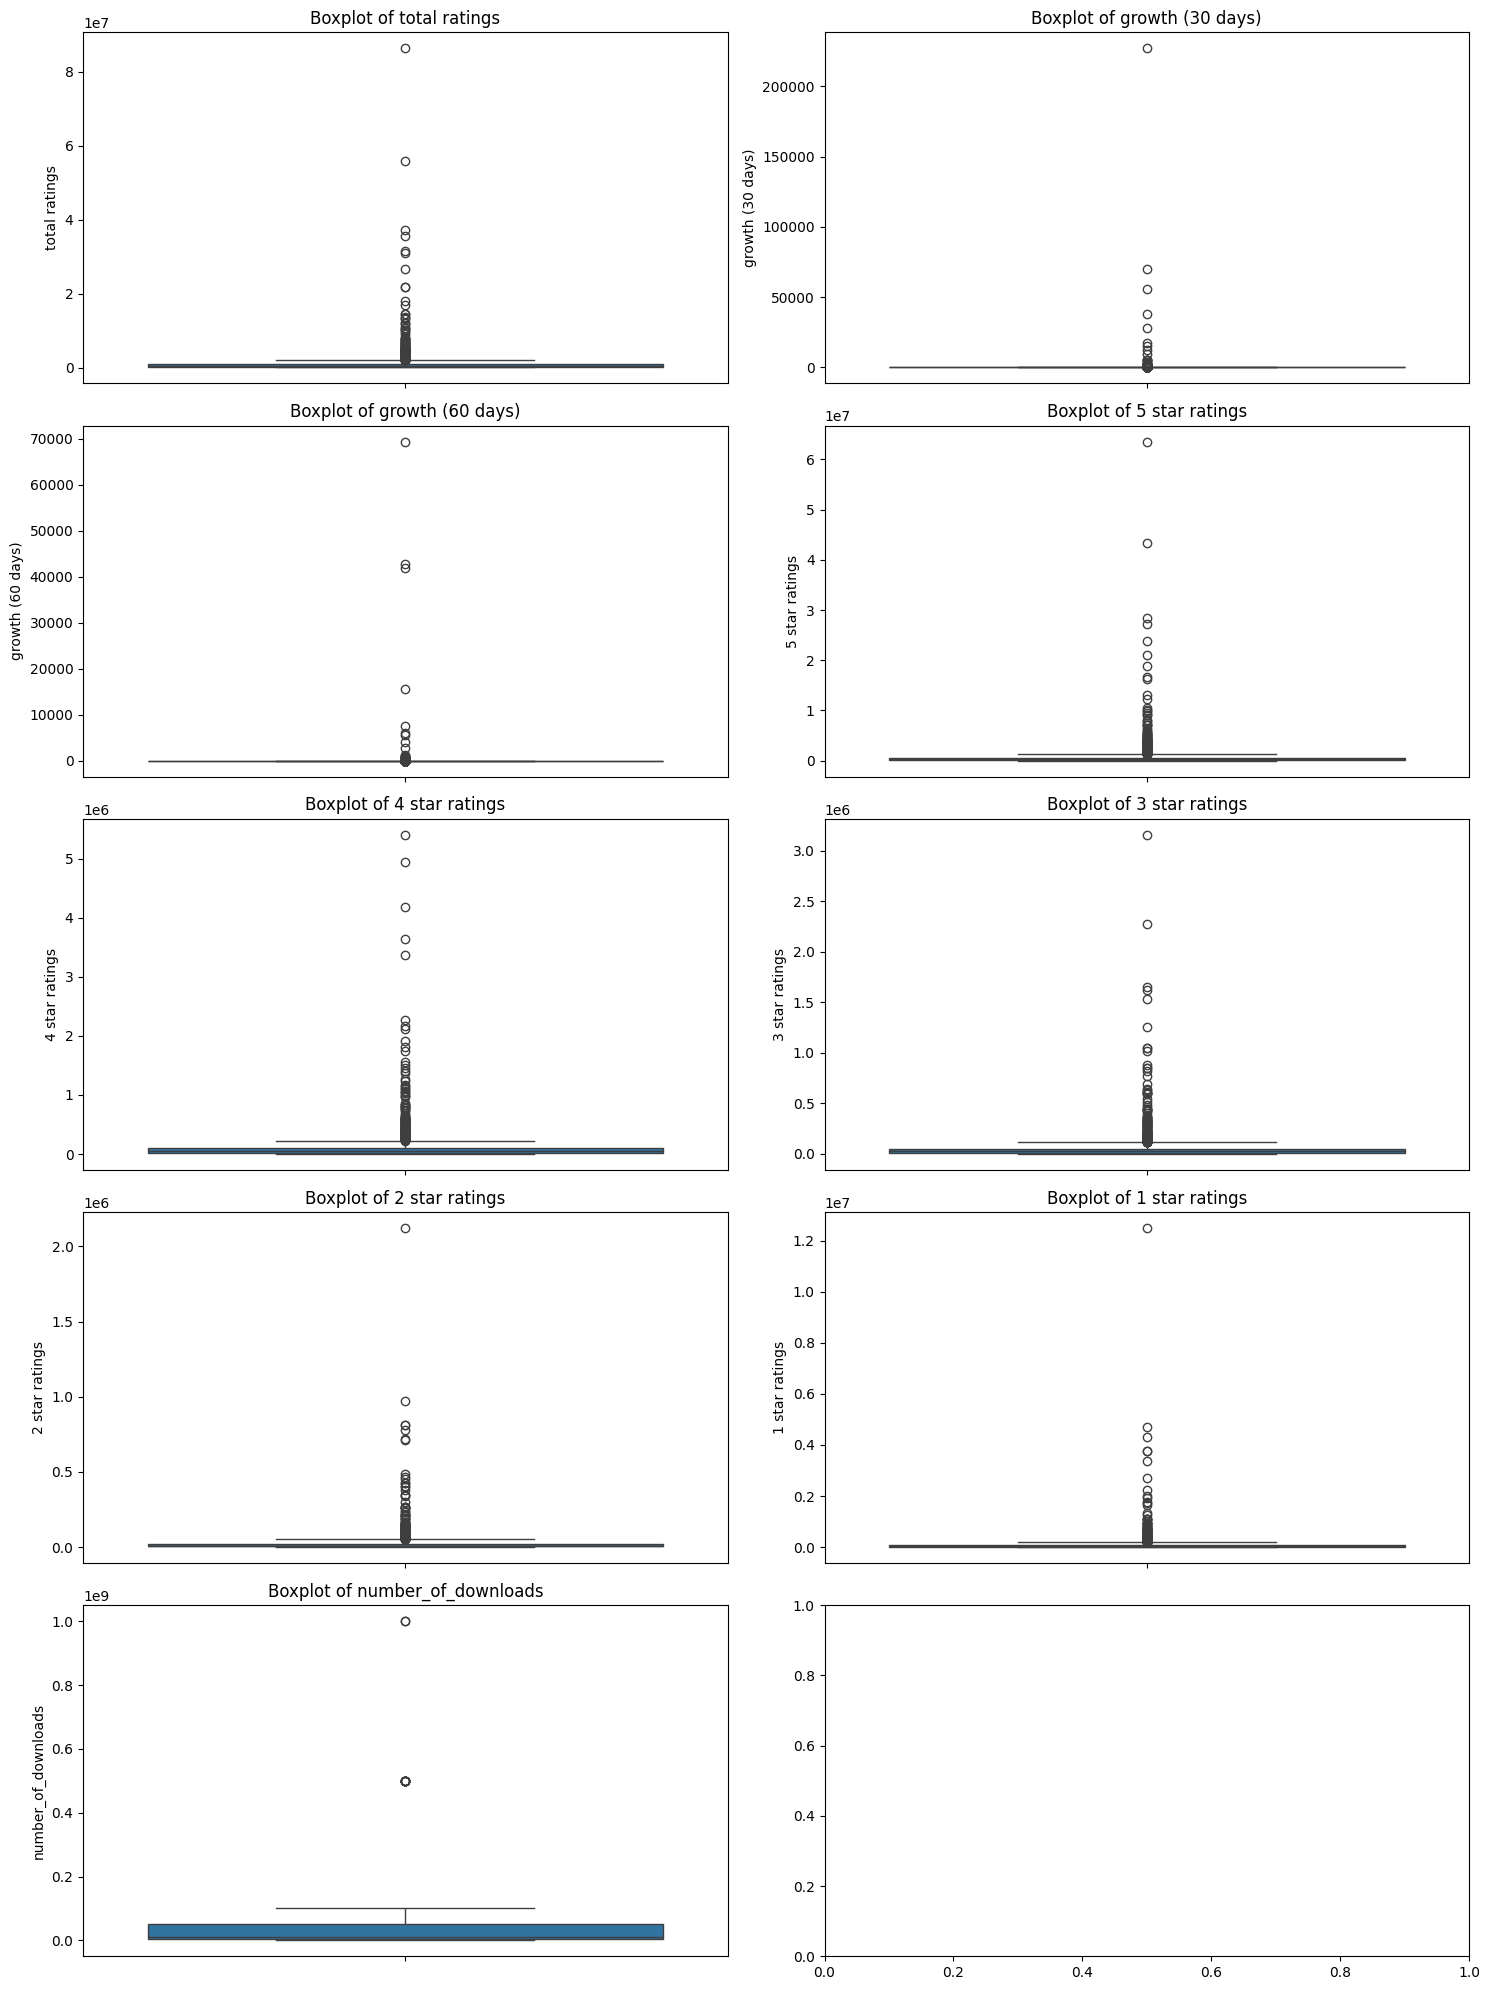

,total ratings,growth (30 days),growth (60 days),5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,number_of_downloads
count,1.730000e+03,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,1.064332e+06,321.735896,122.554971,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05,2.917618e+07
std,3.429250e+06,6018.914507,2253.891703,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05,6.028733e+07
min,3.299300e+04,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02,1.000000e+05
25%,1.759992e+05,0.100000,0.200000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04,5.000000e+06
50%,4.286065e+05,0.500000,1.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04,1.000000e+07
75%,8.837970e+05,1.700000,3.300000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04,5.000000e+07
max,8.627313e+07,227105.700000,69441.400000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07,1.000000e+09


In [ ]:
# List of columns to check for outliers and normalize
columns_to_check = [
    'total ratings', 'growth (30 days)', 'growth (60 days)',
    '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
    '1 star ratings', 'number_of_downloads'
]

# Statistical summary
summary = data[columns_to_check].describe()

# Visualize the distribution of each column to check for outliers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_check):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

summary

1. total ratings: Significant variation with extreme values.
2. growth (30 days) and growth (60 days): High standard deviations and extreme outliers.
3. 5 star ratings, 4 star ratings, 3 star ratings, 2 star ratings, and 1 star ratings: Wide range of values with outliers.
4. number_of_downloads: Large variation with extreme values.

Let's handle these outliers

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers in each column
outliers_dict = {col: detect_outliers(data, col) for col in columns_to_check}

# Remove outliers
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Normalizing the data using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[columns_to_check] = scaler.fit_transform(data[columns_to_check])

data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,number_of_downloads
67,68,Sea Battle 2,0.883116,10.0 M,4,0.466667,0.574074,0.0,GAME ACTION,0.911367,0.882667,0.599396,0.387891,0.270822,False,1.0
71,72,DRAGON BALL Z DOKKAN BATTLE,0.828922,10.0 M,4,0.166667,0.166667,0.0,GAME ACTION,0.799346,0.715984,0.559436,0.572437,0.903966,False,1.0
73,74,FRONTLINE COMMANDO 2,0.774485,10.0 M,4,0.000000,0.018519,0.0,GAME ACTION,0.717260,0.894923,0.866049,0.582657,0.523955,False,1.0
78,79,BombSquad,0.701448,10.0 M,4,0.233333,0.259259,0.0,GAME ACTION,0.669160,0.568347,0.653682,0.671446,0.723273,False,1.0
83,84,Injustice 2,0.622887,10.0 M,4,0.166667,0.240741,0.0,GAME ACTION,0.533097,0.629545,0.705685,0.793280,0.885937,False,1.0


________

# Exploratory Data Analysis

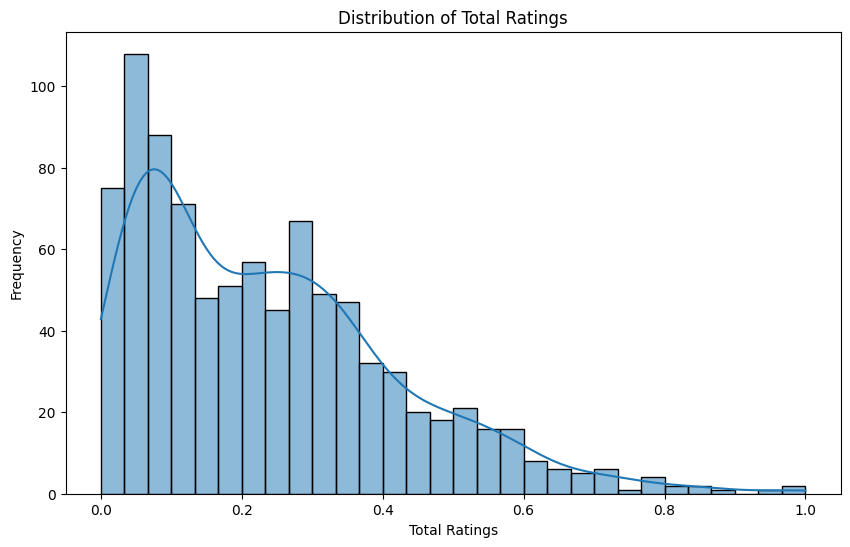

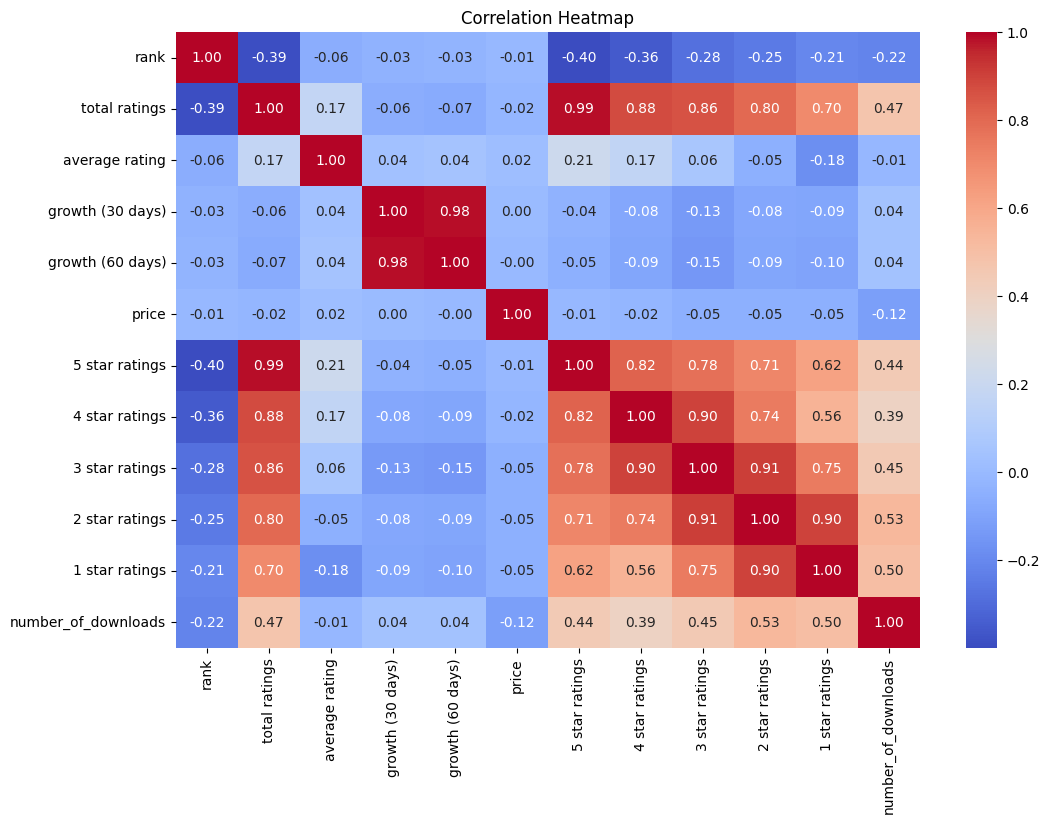

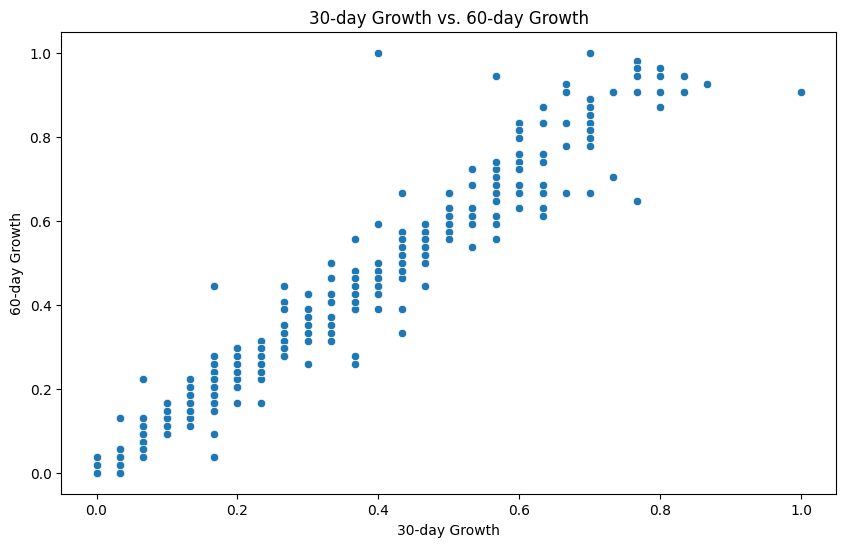

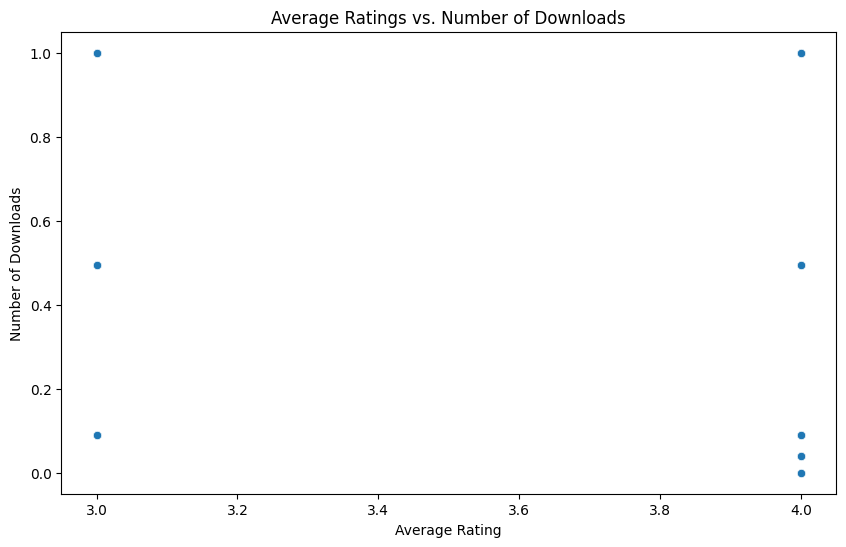

In [ ]:
# Distribution of Total Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['total ratings'], kde=True, bins=30)
plt.title('Distribution of Total Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Frequency')
plt.show()

# Selecting only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Growth Rate Trends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='growth (30 days)', y='growth (60 days)', data=data)
plt.title('30-day Growth vs. 60-day Growth')
plt.xlabel('30-day Growth')
plt.ylabel('60-day Growth')
plt.show()

# Average Ratings vs. Number of Downloads
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average rating', y='number_of_downloads', data=data)
plt.title('Average Ratings vs. Number of Downloads')
plt.xlabel('Average Rating')
plt.ylabel('Number of Downloads')
plt.show()

<ipython-input-48-0544e7e324ea>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




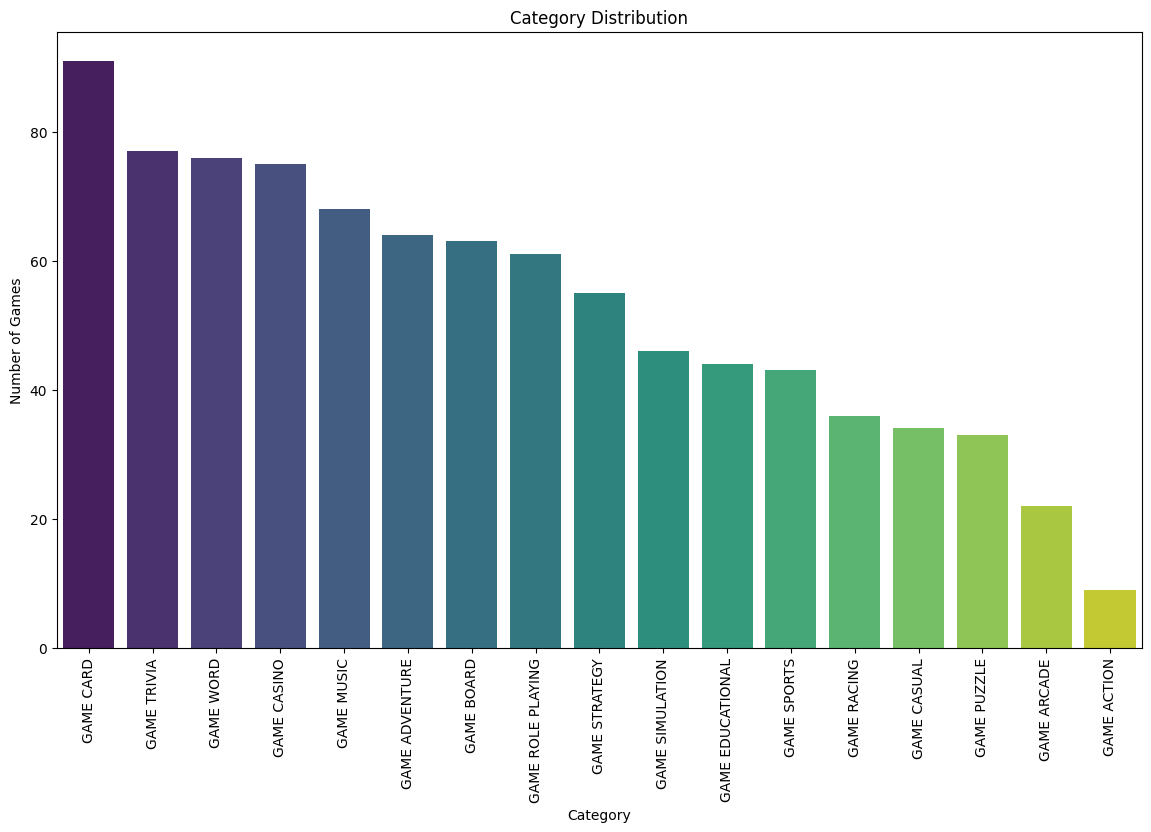

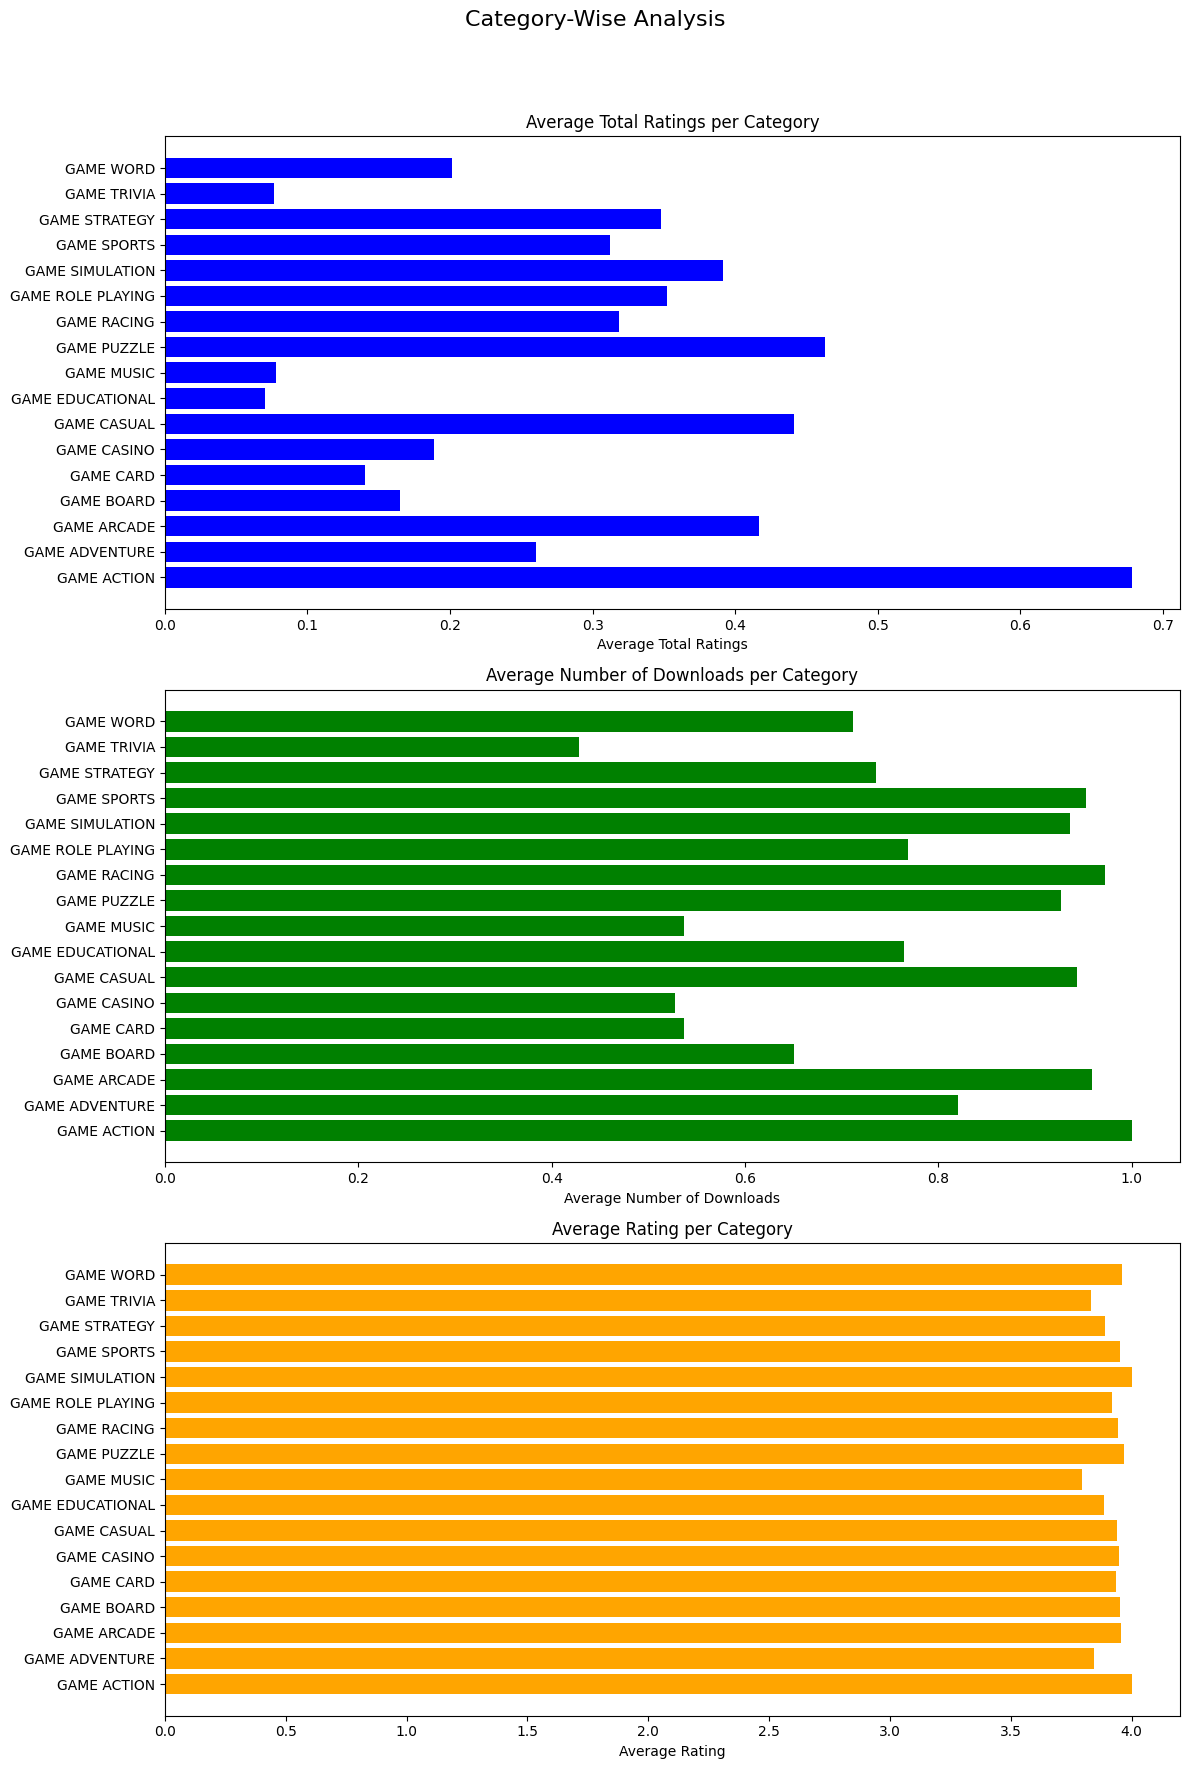

,Category,Average Total Ratings,Average Number of Downloads,Average Rating,Total 5 Star Ratings,Total 4 Star Ratings,Total 3 Star Ratings,Total 2 Star Ratings,Total 1 Star Ratings
0,GAME ACTION,0.677972,1.000000,4.000000,5.741706,5.868968,5.794698,5.261257,5.719725
1,GAME ADVENTURE,0.259983,0.820076,3.843750,15.251897,16.691201,18.548258,18.768814,18.487301
2,GAME ARCADE,0.416795,0.958678,3.954545,8.668513,7.946541,9.111425,8.450821,9.874379
3,GAME BOARD,0.165018,0.650473,3.952381,10.128573,9.729083,9.591807,9.543636,11.033164
4,GAME CARD,0.140480,0.537130,3.934066,12.573710,15.018997,12.088700,10.609879,12.412270
5,GAME CASINO,0.188682,0.527946,3.946667,13.876875,13.157718,13.566075,12.222793,13.261963
6,GAME CASUAL,0.441136,0.943553,3.941176,14.166004,13.592041,15.604204,14.947724,14.335308
7,GAME EDUCATIONAL,0.070240,0.764692,3.886364,2.946474,2.684527,3.677556,4.712016,5.246769
8,GAME MUSIC,0.077630,0.536690,3.794118,4.910690,4.753234,6.630277,7.921276,9.033691
9,GAME PUZZLE,0.462636,0.926538,3.969697,14.532469,16.129229,15.748142,12.761815,10.639733


In [ ]:
# Calculate average metrics per category
category_analysis = data.groupby('category').agg({
    'total ratings': 'mean',
    'number_of_downloads': 'mean',
    'average rating': 'mean',
    '5 star ratings': 'sum',
    '4 star ratings': 'sum',
    '3 star ratings': 'sum',
    '2 star ratings': 'sum',
    '1 star ratings': 'sum'
}).reset_index()

# Rename columns for clarity
category_analysis.columns = [
    'Category',
    'Average Total Ratings',
    'Average Number of Downloads',
    'Average Rating',
    'Total 5 Star Ratings',
    'Total 4 Star Ratings',
    'Total 3 Star Ratings',
    'Total 2 Star Ratings',
    'Total 1 Star Ratings'
]

# Category Distribution
plt.figure(figsize=(14, 8))
category_counts = data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Category-Wise Analysis', fontsize=16)

# Average Total Ratings per Category
axes[0].barh(category_analysis['Category'], category_analysis['Average Total Ratings'], color='blue')
axes[0].set_title('Average Total Ratings per Category')
axes[0].set_xlabel('Average Total Ratings')

# Average Number of Downloads per Category
axes[1].barh(category_analysis['Category'], category_analysis['Average Number of Downloads'], color='green')
axes[1].set_title('Average Number of Downloads per Category')
axes[1].set_xlabel('Average Number of Downloads')

# Average Rating per Category
axes[2].barh(category_analysis['Category'], category_analysis['Average Rating'], color='orange')
axes[2].set_title('Average Rating per Category')
axes[2].set_xlabel('Average Rating')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



category_analysis


1. Average Total Ratings:
The GAME ACTION category has the highest average total ratings, followed by GAME CASUAL and GAME ARCADE.
The categories with the lowest average total ratings are GAME EDUCATIONAL, GAME MUSIC, and GAME TRIVIA.

2. Average Number of Downloads:
GAME ACTION games have the highest average number of downloads, significantly higher than other categories.
GAME CASUAL and GAME ARCADE categories also have high average downloads.
GAME TRIVIA and GAME CASINO have the lowest average number of downloads.

3. Average Rating:
The average rating is relatively consistent across categories, generally around 3.9 to 4.0.
GAME CASUAL and GAME RACING categories have slightly higher average ratings, while GAME MUSIC has the lowest average rating.

In [ ]:
import plotly.graph_objects as go

x = data['category']
fig = go.Figure(go.Bar(x=x, y=data['5 star ratings'], name='5 Star'))
fig.add_trace(go.Bar(x=x, y=data['4 star ratings'], name='4 Star'))
fig.add_trace(go.Bar(x=x, y=data['3 star ratings'], name='3 Star'))
fig.add_trace(go.Bar(x=x, y=data['2 star ratings'], name='2 Star'))
fig.add_trace(go.Bar(x=x, y=data['1 star ratings'], name='1 Star'))

fig.update_layout(barmode='stack',
                  title_text="Rating distribution of different types of game", xaxis = {'categoryorder':'total descending'})
fig.show()

_________

# Analysis Questions

#### 1. Which game category has the highest number of downloads?

,category,number_of_downloads
16,GAME WORD,543000000
1,GAME ADVENTURE,526000000
4,GAME CARD,493000000
11,GAME ROLE PLAYING,470000000
12,GAME SIMULATION,431000000


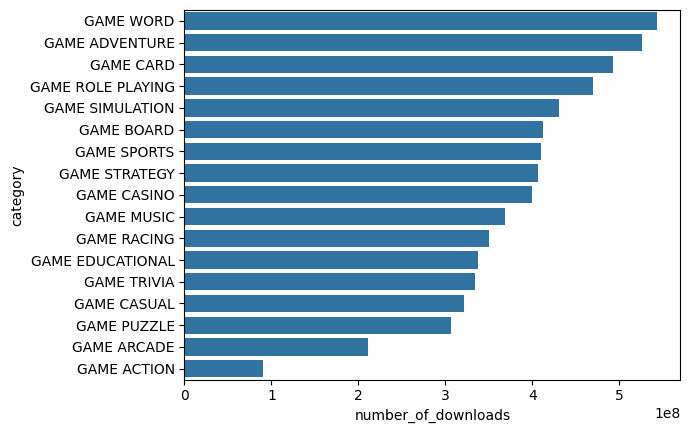

In [ ]:
q1=data.copy()
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000, '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000, '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
q1['number_of_downloads'] = q1['installs'].map(number_of_downloads)
q1 = q1.groupby(by='category')['number_of_downloads'].sum().reset_index()
q1 = q1.sort_values(by='number_of_downloads',ascending=False)
sns.barplot(y='category',x='number_of_downloads', data=q1)
q1.head()

#### 2. With respect to downloads and average ratings, which category holds the most number of popular games?

In [ ]:
# Define popular games as those with above-median downloads and ratings of 4 or higher
q2 = pd.read_csv(data_dir)
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000, '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000, '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
q2['number_of_downloads'] = q2['installs'].map(number_of_downloads)

median_downloads = q2['number_of_downloads'].median()
popular_games = q2[(q2['number_of_downloads'] > median_downloads) & (q2['average rating'] >= 4)]

# Count popular games per category
popular_games_category_count = popular_games['category'].value_counts()

# Find the category with the most number of popular games
most_popular_games_category = popular_games_category_count.idxmax()
most_popular_games_count = popular_games_category_count.max()

most_popular_games_category, most_popular_games_count

('GAME ACTION', 64)

#### 3. What are the average ratings of games in free vs paid games?

In [ ]:
q3free = data[(data['paid']==False)]
q3paid = data[(data['paid']==True)]
freemean = q3free['average rating'].mean()
paidmean=q3paid['average rating'].mean()
print("The Average rating of free games are :",round(freemean,3))
print("The Average rating of paid games are :",round(paidmean,3))

The Average rating of free games are : 3.914
The Average rating of paid games are : 4.0


#### 4. Which category of games has grown the most in the last 30 and 60 days?

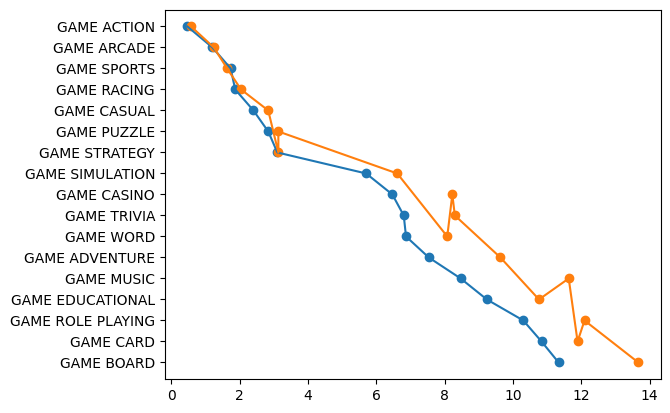

In [ ]:
q4 = data.sort_values(by = 'growth (30 days)', ascending=False).head(200)
q4=q4.groupby(by = 'category')['growth (30 days)'].sum().reset_index().sort_values(by = 'growth (30 days)', ascending=False)
plt.scatter(q4['growth (30 days)'], q4['category'])
plt.plot(q4['growth (30 days)'], q4['category'])
q4 = data.sort_values(by = 'growth (60 days)', ascending=False).head(200)
q4=q4.groupby(by = 'category')['growth (60 days)'].sum().reset_index().sort_values(by = 'growth (60 days)', ascending=False)
plt.scatter(q4['growth (60 days)'], q4['category'])
plt.plot(q4['growth (60 days)'], q4['category'])

#### 5. Which Category of games have the most number of negative reviews?

<Axes: xlabel='negative reviews', ylabel='category'>

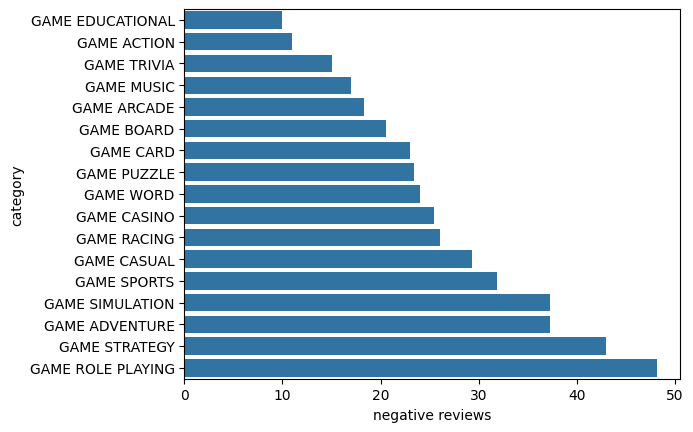

In [ ]:
q5 = data.copy()
q5['negative reviews'] = q5['1 star ratings']+q5['2 star ratings']
q5 = q5.groupby(by='category')['negative reviews'].sum().reset_index().sort_values(by= 'negative reviews')
sns.barplot(y='category',x='negative reviews', data=q5)

<Axes: xlabel='negative reviews', ylabel='category'>

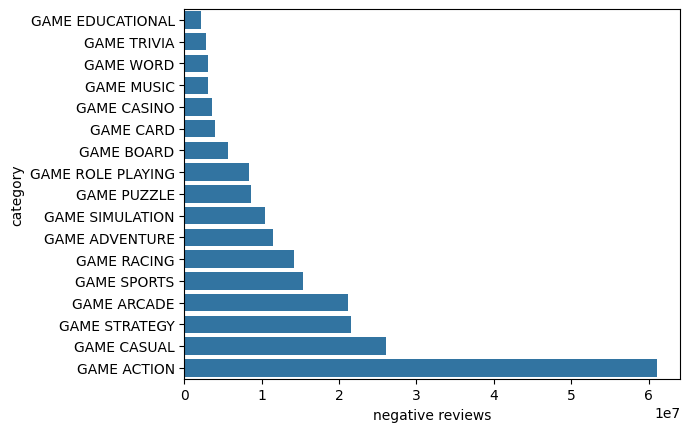

In [ ]:
q5 = pd.read_csv(data_dir)
q5['negative reviews'] = q5['1 star ratings']+q5['2 star ratings']
q5 = q5.groupby(by='category')['negative reviews'].sum().reset_index().sort_values(by= 'negative reviews')
sns.barplot(y='category',x='negative reviews', data=q5)

#### 6. Is there a relationship between average rating of a game and its growth in 30 days and 60 days?

In [ ]:
columnA=data['average rating']
columnB=data['growth (30 days)']
correlation = columnA.corr(columnB)
print(correlation)

0.036168827321234956


In [ ]:
columnA=data['average rating']
columnB=data['growth (60 days)']
correlation = columnA.corr(columnB)
print(correlation)

0.04447081027546524


#### 7. What is the proportion of positive to negative reviews for each category? Are there categories that are generally well-received compared to others?

<ipython-input-58-df388a80b31d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




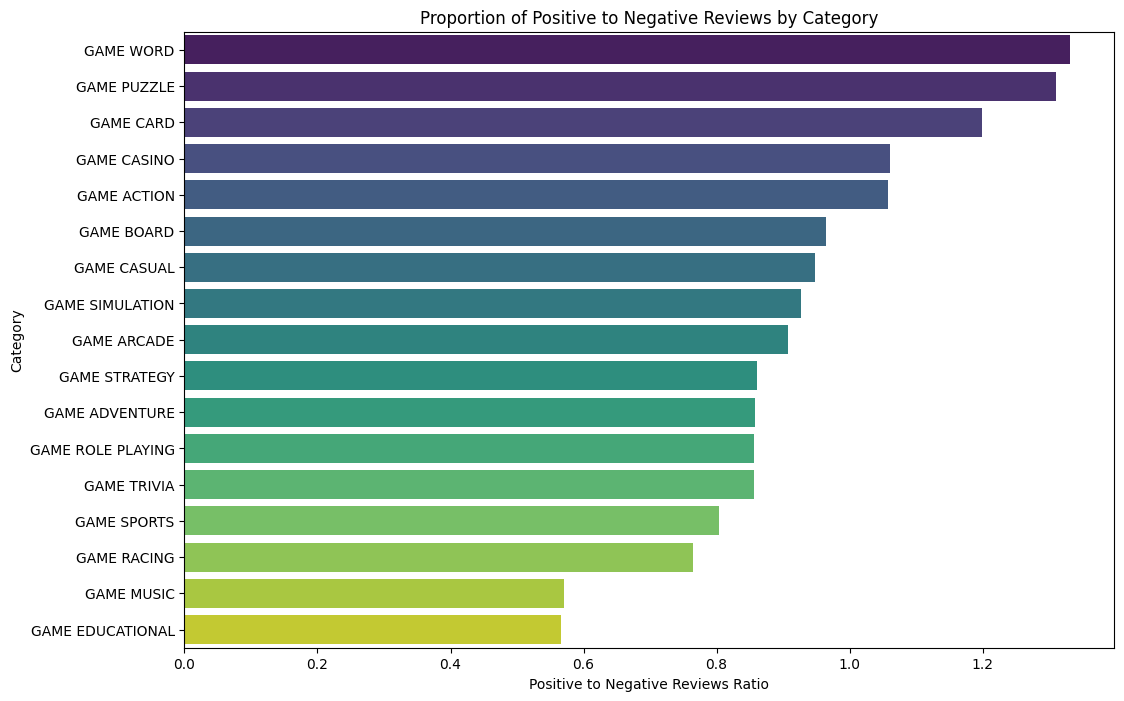

In [ ]:
# Calculate the total number of positive reviews (4 and 5 star ratings) and negative reviews (1 and 2 star ratings) per category
data['positive reviews'] = data['4 star ratings'] + data['5 star ratings']
data['negative reviews'] = data['1 star ratings'] + data['2 star ratings']

# Group by category and sum the positive and negative reviews
category_sentiment = data.groupby('category')[['positive reviews', 'negative reviews']].sum().reset_index()

# Calculate the proportion of positive to negative reviews
category_sentiment['positive_to_negative_ratio'] = category_sentiment['positive reviews'] / category_sentiment['negative reviews']

category_sentiment = category_sentiment.sort_values(by='positive_to_negative_ratio', ascending=False)

# Plot the proportion of positive to negative reviews for each category
plt.figure(figsize=(12, 8))
sns.barplot(y='category', x='positive_to_negative_ratio', data=category_sentiment, palette='viridis')
plt.xlabel('Positive to Negative Reviews Ratio')
plt.ylabel('Category')
plt.title('Proportion of Positive to Negative Reviews by Category')
plt.show()


---

# ML MODELS


- [Game Category Recommendation system using clustering.](#scrollTo=IDwxVubeUyA6&line=1&uniqifier=1)
- [Growth Forecasting using ARIMA](#scrollTo=FcF2FBDlUyA6&line=1&uniqifier=1)
- [Downloads Prediction uisng XGBoost](#scrollTo=0qxwX6pPYNVj&line=1&uniqifier=1)


## Game Category Recommendation system using Clustering.
<a id="Clustering"></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv(data_dir)

number_of_downloads = {
    '100.0 k': 100000, '500.0 k': 500000, '1.0 M': 1000000, '5.0 M': 5000000,
    '10.0 M': 10000000, '50.0 M': 50000000, '100.0 M': 100000000, '500.0 M': 500000000,
    '1000.0 M': 1000000000
}
data['number_of_downloads'] = data['installs'].map(number_of_downloads)

# Data Preparation: Handle missing values and encode categorical variables
# Fill missing numerical values with the median
imputer = SimpleImputer(strategy='median')
numerical_columns = [
    'total ratings', 'average rating', 'growth (30 days)', 'growth (60 days)',
    '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
    '1 star ratings', 'number_of_downloads'
]
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Fill missing categorical values with the most frequent value
categorical_columns = ['category']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Feature Engineering: Select relevant features for clustering
features = [
    'total ratings', 'average rating', 'growth (30 days)', 'growth (60 days)',
    '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
    '1 star ratings', 'number_of_downloads'
] + [col for col in data.columns if col.startswith('category_')]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Display the processed data
processed_data = pd.DataFrame(scaled_features, columns=features)
processed_data.head()


,total ratings,average rating,growth (30 days),growth (60 days),5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,number_of_downloads,...,category_GAME EDUCATIONAL,category_GAME MUSIC,category_GAME PUZZLE,category_GAME RACING,category_GAME ROLE PLAYING,category_GAME SIMULATION,category_GAME SPORTS,category_GAME STRATEGY,category_GAME TRIVIA,category_GAME WORD
0,24.854836,0.315954,-0.053121,-0.051328,24.738538,15.999533,20.748749,25.699610,30.359395,7.811922,...,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.252904
1,10.562915,0.315954,-0.053170,-0.052793,10.866172,6.779894,8.001448,9.601324,11.287015,7.811922,...,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.252904
2,7.467134,0.315954,-0.053220,-0.052970,7.098619,5.613352,6.646257,8.424842,10.306029,1.175111,...,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.252904
3,4.931723,0.315954,-0.053237,-0.052438,4.829292,4.755475,4.796024,4.650050,5.188648,1.175111,...,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.252904
4,3.908662,0.315954,-0.053337,-0.053725,3.571855,6.646405,6.627132,4.337078,2.407421,7.811922,...,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.247689,-0.252904


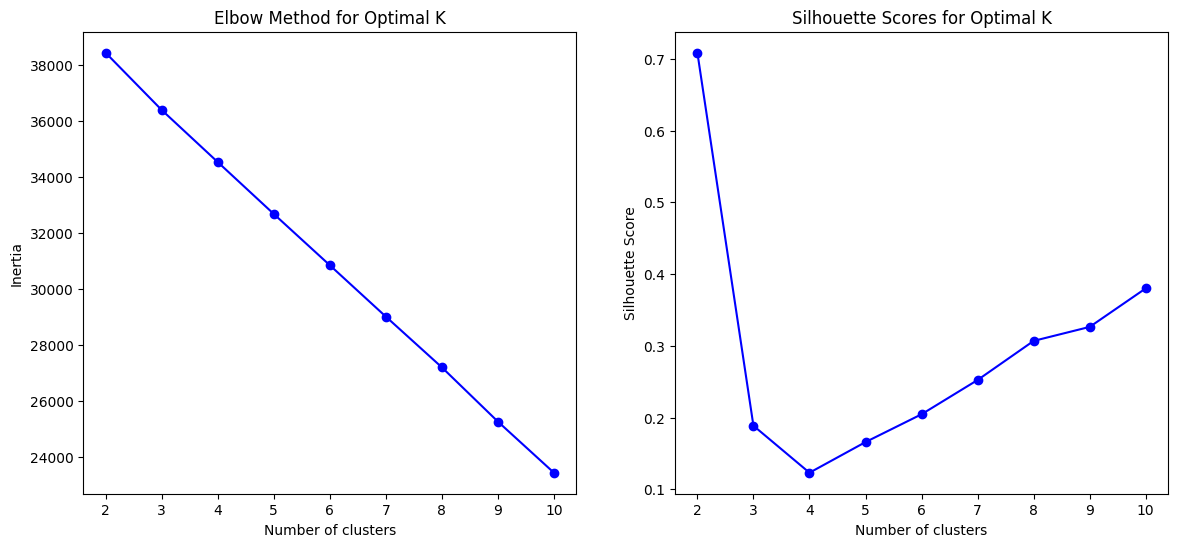

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,  init='k-means++', n_init = 10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the Elbow method results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')

plt.show()

In [ ]:
# Train the K-Means model with the selected number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
kmeans.fit(scaled_features)

# Add the cluster labels to the original data
data['cluster'] = kmeans.labels_

# Evaluate the clusters using the silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
silhouette_avg


0.12306774388929936

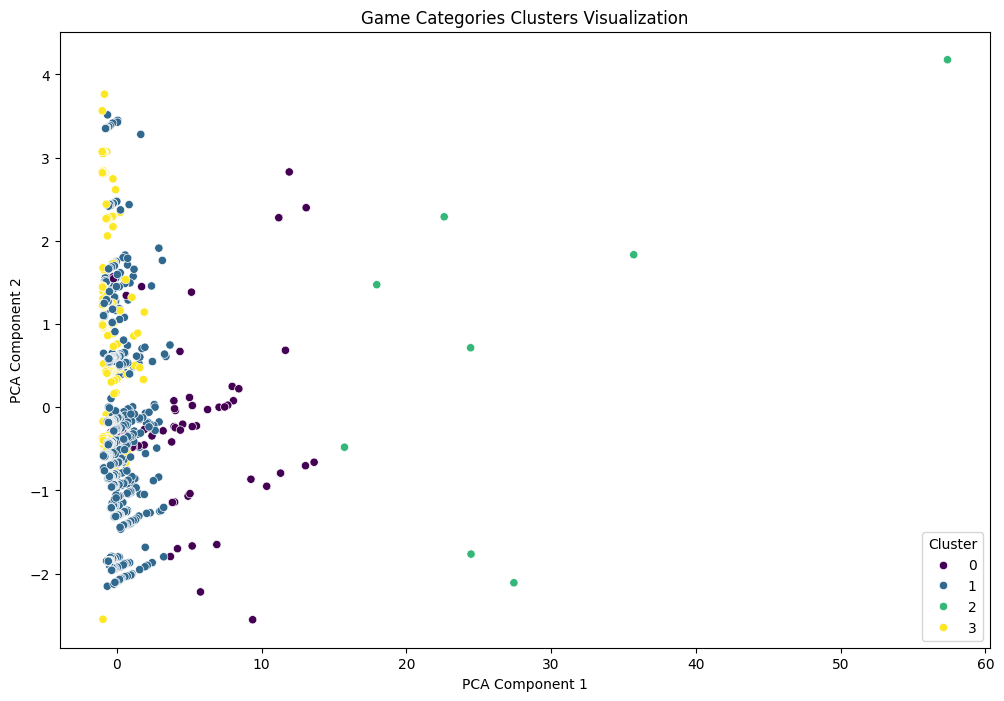

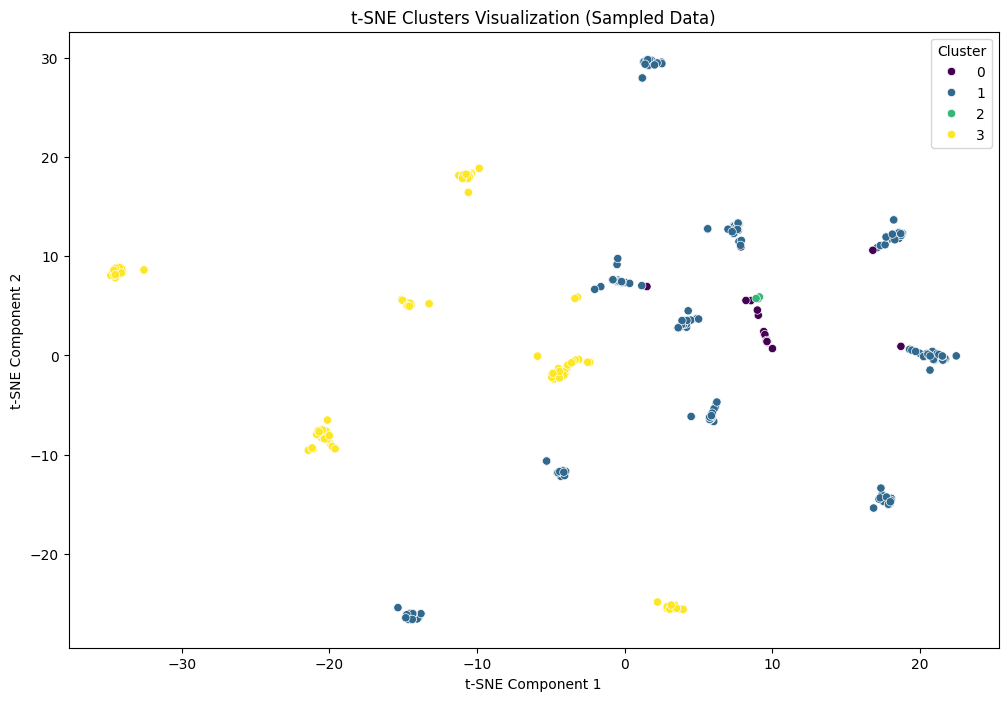

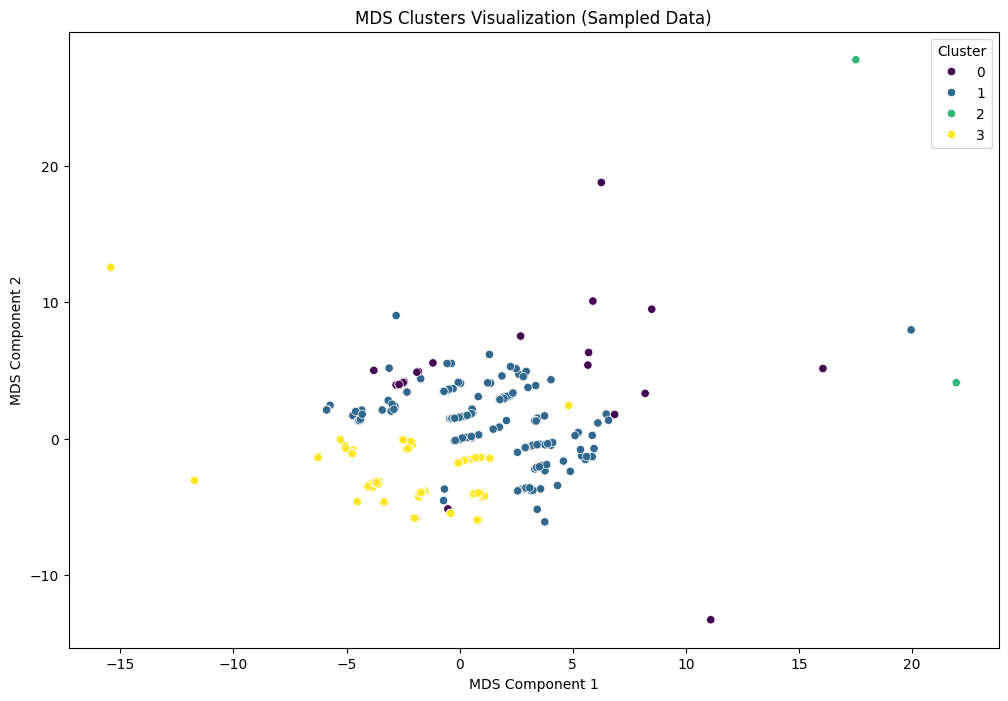

In [ ]:
# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components and cluster labels to the data
data['pca1'] = pca_components[:, 0]
data['pca2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('Game Categories Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Reduce the dataset size by taking a random sample
sampled_data = data.sample(n=500, random_state=42)

# Scale the features for the sampled data
scaled_sampled_features = scaler.fit_transform(sampled_data[features])

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_sampled_features)

# Add t-SNE components to the sampled data
sampled_data['tsne1'] = tsne_components[:, 0]
sampled_data['tsne2'] = tsne_components[:, 1]

# Plot the t-SNE clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=sampled_data, palette='viridis')
plt.title('t-SNE Clusters Visualization (Sampled Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# MDS Visualization
mds = MDS(n_components=2, random_state=42, normalized_stress='auto')
mds_components = mds.fit_transform(scaled_sampled_features)

# Add MDS components to the sampled data
sampled_data['mds1'] = mds_components[:, 0]
sampled_data['mds2'] = mds_components[:, 1]

# Plot the MDS clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mds1', y='mds2', hue='cluster', data=sampled_data, palette='viridis')
plt.title('MDS Clusters Visualization (Sampled Data)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Cluster')
plt.show()


#### Insights for Recommendation:
1. Cluster 0: Recommend games from the GAME TRIVIA category for users interested in high-growth games.
2. Cluster 1: Recommend games from the GAME PUZZLE and GAME CASUAL categories for users seeking well-rated games with steady growth.
3. Cluster 2: Recommend games from the GAME SPORTS and GAME STRATEGY categories for users interested in highly rated games with stable ratings.
4. Cluster 3: Recommend games from GAME EDUCATIONAL, GAME MUSIC, and GAME RACING categories for users looking for games with recent high growth.

________________________

## Growth forecasting using ARIMA
<a id="Forecasting"></a>

In [ ]:
data = pd.read_csv(data_dir)

number_of_downloads = {
    '100.0 k': 100000, '500.0 k': 500000, '1.0 M': 1000000, '5.0 M': 5000000,
    '10.0 M': 10000000, '50.0 M': 50000000, '100.0 M': 100000000, '500.0 M': 500000000,
    '1000.0 M': 1000000000
}
data['number_of_downloads'] = data['installs'].map(number_of_downloads)

# Convert to a time series format assuming 'growth (30 days)' is a monthly growth metric
data['date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
data.set_index('date', inplace=True)

# Select relevant columns for forecasting
data = data[['category', 'number_of_downloads', 'average rating', 'growth (30 days)', 'growth (60 days)']]

In [ ]:
# Function to create lag features
def create_lag_features(df, lags=3):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}_downloads'] = df['number_of_downloads'].shift(lag)
        df[f'lag_{lag}_rating'] = df['average rating'].shift(lag)
    df.dropna(inplace=True)
    return df

# Apply the function to each category
category_dfs = {}
for category in data['category'].unique():
    category_df = data[data['category'] == category].copy()
    category_df = create_lag_features(category_df)
    category_dfs[category] = category_df


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Dictionary to store the models and forecasts
category_models = {}
category_forecasts = {}

# Fit ARIMA models and forecast for each category
for category, df in category_dfs.items():
    model = ARIMA(df['number_of_downloads'], order=(5, 1, 0), freq = 'M')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
    category_models[category] = model_fit
    category_forecasts[category] = forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

In [ ]:
from sklearn.metrics import mean_squared_error

# Dictionary to store RMSE for each category
category_rmse = {}

# Evaluate the models
for category, df in category_dfs.items():
    # Forecast last 12 months to compare with actual data
    model_fit = category_models[category]
    actuals = df['number_of_downloads'][-12:]
    forecast = model_fit.forecast(steps=12)
    rmse = mean_squared_error(actuals, forecast, squared=False)
    category_rmse[category] = rmse

# Print RMSE for each category
for category, rmse in category_rmse.items():
    print(f"Category: {category}, RMSE: {rmse:.2f}")


Category: GAME ACTION, RMSE: 34761089.36
Category: GAME ADVENTURE, RMSE: 3961040.21
Category: GAME ARCADE, RMSE: 23855195.40
Category: GAME BOARD, RMSE: 4973724.00
Category: GAME CARD, RMSE: 4540849.63
Category: GAME CASINO, RMSE: 1154700.54
Category: GAME CASUAL, RMSE: 16383250.53
Category: GAME EDUCATIONAL, RMSE: 2755087.46
Category: GAME MUSIC, RMSE: 4460085.63
Category: GAME PUZZLE, RMSE: 41196468.32
Category: GAME RACING, RMSE: 28315425.10
Category: GAME ROLE PLAYING, RMSE: 3520168.51
Category: GAME SIMULATION, RMSE: 11636866.70
Category: GAME SPORTS, RMSE: 2036033.26
Category: GAME STRATEGY, RMSE: 3928283.09
Category: GAME TRIVIA, RMSE: 237104.25
Category: GAME WORD, RMSE: 4538167.05


#### The high RMSE's indicate this data and model are not suitable for growth forecasting.

______

# Downloads Prediction using XGBoost

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(data_dir)

# Mapping the installs to actual numbers
number_of_downloads = {
    '100.0 k': 100000, '500.0 k': 500000, '1.0 M': 1000000, '5.0 M': 5000000,
    '10.0 M': 10000000, '50.0 M': 50000000, '100.0 M': 100000000, '500.0 M': 500000000,
    '1000.0 M': 1000000000
}
data['number_of_downloads'] = data['installs'].map(number_of_downloads)

# Encode the 'category' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categories = encoder.fit_transform(data[['category']])
encoded_category_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['category']))
data = pd.concat([data, encoded_category_df], axis=1)
data.drop(columns=['category'], inplace=True)

# Update the features list to include the new encoded category columns
encoded_category_features = list(encoded_category_df.columns)

# Define the features and target variable for download prediction
features_download = ['total ratings', 'average rating', 'paid',
                    '5 star ratings', '4 star ratings', '3 star ratings',
                    '2 star ratings', '1 star ratings'] + encoded_category_features
target_download = 'number_of_downloads'

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[features_download] = imputer.fit_transform(data[features_download])

# Separate the features and target variable
X_download = data[features_download]
y_download = data[target_download]

# Split the data into training and testing sets
X_train_download, X_test_download, y_train_download, y_test_download = train_test_split(X_download, y_download, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_download = scaler.fit_transform(X_train_download)
X_test_download = scaler.transform(X_test_download)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search_xgb.fit(X_train_download, y_train_download)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_xgb, best_score_xgb


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



({'colsample_bytree': 0.8,
  'learning_rate': 0.01,
  'max_depth': 6,
  'n_estimators': 200,
  'subsample': 0.8},
 0.5671354625988757)

In [75]:
# Train the XGBoost model with the best parameters
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params_xgb, random_state=42)
final_xgb_model.fit(X_train_download, y_train_download)

# Predict on the test set
final_y_pred_xgb = final_xgb_model.predict(X_test_download)

# Evaluate the model
final_mse_xgb = mean_squared_error(y_test_download, final_y_pred_xgb)
final_r2_xgb = r2_score(y_test_download, final_y_pred_xgb)

print("Final XGBoost Model MSE:", final_mse_xgb)
print("Final XGBoost Model R2 Score:", final_r2_xgb)

Final XGBoost Model MSE: 1239804561868553.5
Final XGBoost Model R2 Score: 0.46977639896106205


#### The model is able to explain around 47% of the variance in the number of downloads, which indicates a moderate level of performance. The high MSE is due to the large range of download numbers in the dataset.